سهند نوعی 9923087 تمرین دوم

https://colab.research.google.com/drive/1C_HyAcn6h-ltakFQipbVbTslxy3JjNHT#scrollTo=2ns3v6zqNom3

<div dir=rtl>
<font color='red' size="6">آماده سازی نوت بوک</font>
<div dir=rtl>

><font size = "4"> 1.  قبل از هر کاری، با استفاده از مسیر نوشته شده در خط پایین، یک کپی از این نوتبوک در گوگل درایو خودتان بسازید و تمرین را در آن نسخه حل کنید.



<div dir=ltr>
<font size = "4" color='blue'>
File --> Save a copy in Drive
</font>
<div dir=rtl>

><font size = "4"> 2.   برای دسترسی به تصاویر مورد نیاز در این تکلیف، بدون اعمال هیچ تغییری در بلوک زیر، آن را اجرا کنید. با این کار فایل های مربوط به تکلیف (تصاویر) دانلود و در فولدر کولب شما قرار داده می شوند. انجام این مرحله پس از هر بار قطع شدن از کولب و اتصال دوباره، ضروری است. یعنی اگر مثلا یک سوال را حل کردید و بعد کولب را بستید یا مدتی با آن کار نکردید و اتصالتان به طور خودکار قطع شد، در اقدام بعدیتان برای نوشتن بقیه‌ی تمرین، حتما این بلوک باید دوباره اجرا شود.

In [2]:
#@title RUN THIS BLOCK WITHOUT ANY CHANGE to download the data
!wget --no-check-certificate 'https://drive.usercontent.google.com/download?id=1_AbCo7shlrAPA5C3ub8smakCCdNnaRbG&export=download&authuser=0&confirm=t&uuid=d1fa3111-dbfc-414e-84e3-c4e66c004c00&at=APZUnTUhB_03yvHtcoJ3grMv6-IG:1698755987446' -O 'DIP_HW2.zip'
!unzip DIP_HW2.zip

--2023-12-02 01:49:40--  https://drive.usercontent.google.com/download?id=1_AbCo7shlrAPA5C3ub8smakCCdNnaRbG&export=download&authuser=0&confirm=t&uuid=d1fa3111-dbfc-414e-84e3-c4e66c004c00&at=APZUnTUhB_03yvHtcoJ3grMv6-IG:1698755987446
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.203.132, 2607:f8b0:400e:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 445128 (435K) [application/octet-stream]
Saving to: ‘DIP_HW2.zip’

DIP_HW2.zip         100%[===================>] 434.70K  --.-KB/s    in 0.003s  

2023-12-02 01:49:40 (128 MB/s) - ‘DIP_HW2.zip’ saved [445128/445128]

Archive:  DIP_HW2.zip
replace Blur_Hand.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Imports
<div dir=rtl>
<font color="blue" size="6">فراخوانی کتابخانه ها</font>
<div dir=rtl>




In [3]:
###
import cv2
import matplotlib.pyplot as plt
import numpy as np
###

# Any Helper Functions

<div dir=rtl>
<font color="blue" size = "4">در صورت نیاز یا برای راحتی خودتان می‌توانید توابع کمکی‌ (مثلا برای عملیات‌های پر تکرار) این جا تعریف کنید (همه در همین بلوک).</font>
</div>



In [4]:
###
def standard_show(image, title):
    max_intensity = np.max(image)
    min_intensity = np.min(image)
    plt.title(title, color="blue")
    plt.imshow(image, cmap="gray", vmin=min_intensity, vmax=max_intensity)
    plt.axis("off")
    plt.show()

def show_plots(images_list, titles_list, rows=1):
    columns = len(images_list)
    fig, axes = plt.subplots(rows, columns, figsize=(20, 20))
    for i in range(columns):
        if rows == 1:
            axes[i].imshow(images_list[i], cmap="gray", vmin=np.min(images_list[i]), vmax=np.max(images_list[i]))
            axes[i].set_title(titles_list[i], color="blue")
            axes[i].axis("off")

        if rows >= 2:
            axes[0, i].imshow(images_list[i], cmap="gray", vmin=np.min(images_list[i]), vmax=np.max(images_list[i]))
            axes[0, i].set_title(titles_list[i], color="blue")
            axes[0, i].axis("off")

            bin_num = (np.max(images_list[i]) - np.min(images_list[i]) + 1) / 4
            bin_num = int(np.ceil(bin_num))
            hist, bins = np.histogram(images_list[i], bins=bin_num, range=(np.min(images_list[i]), np.max(images_list[i])))
            axes[1, i].bar(bins[:-1], hist)
    plt.show()

###

# Question 5: Low Pass Filters (30%)

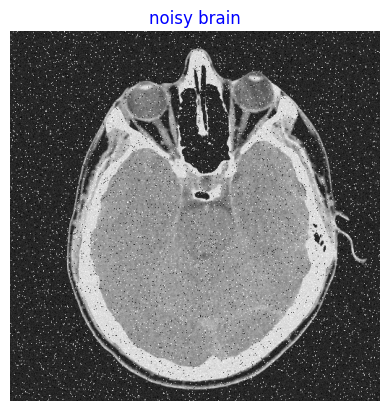

In [5]:
#@title Q5 - Part 1 (5%)
###
noisy_brain = cv2.imread("noisy_brain.png", cv2.IMREAD_GRAYSCALE)
standard_show(noisy_brain, "noisy brain")
###

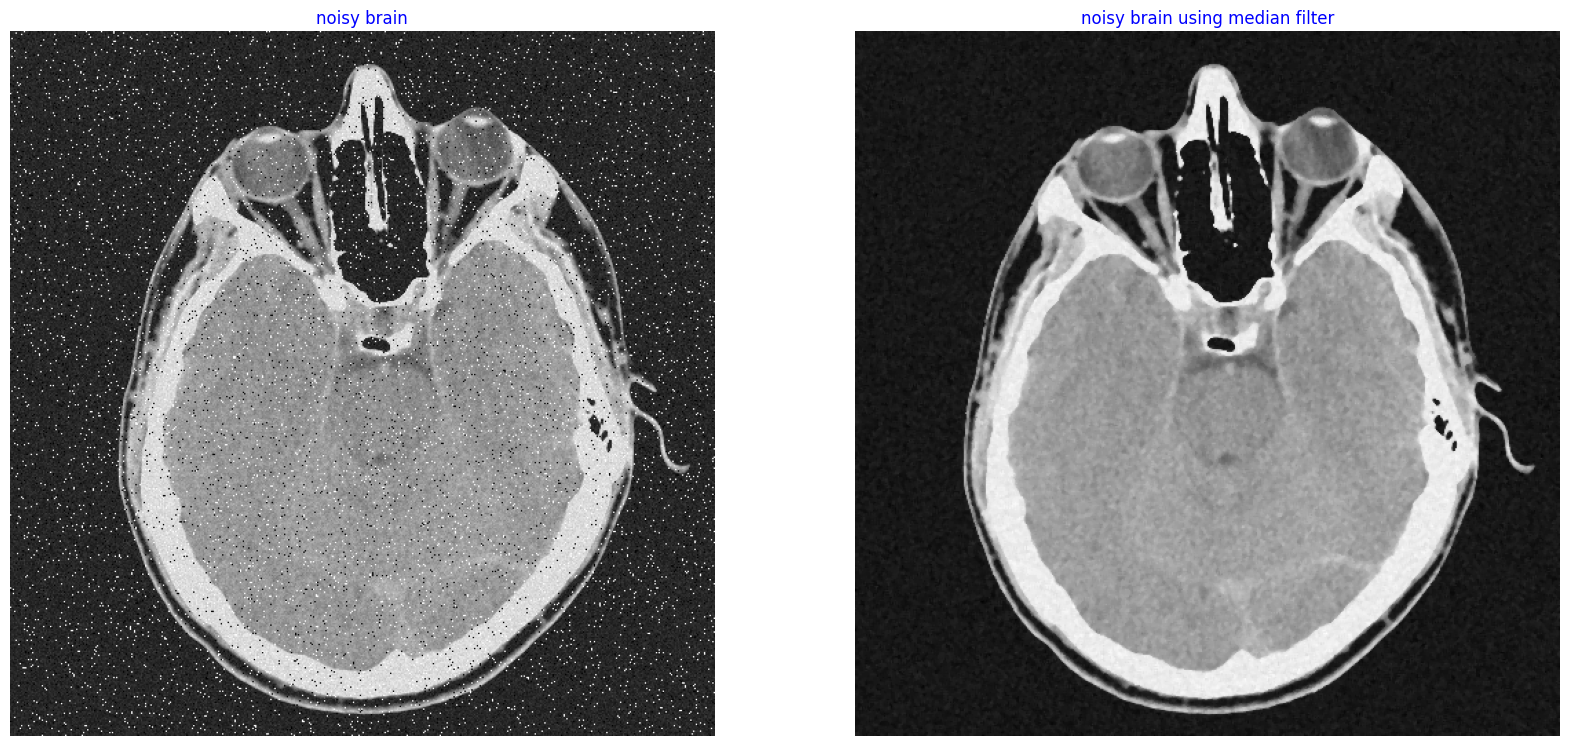

In [6]:
#@title Q5 - Part 2 (10%)
###
median_blur_brain = cv2.medianBlur(noisy_brain, 3)
show_plots([noisy_brain, median_blur_brain], ["noisy brain", "noisy brain using median filter"])
###

In [7]:
#@title Q5 - Part 3 (10%)

# NO CODE REQUIRED FOR THIS PART.

<div dir=rtl><font color='green' size="5">جواب سوال ۵-۳</font>
<div>

<div dir=rtl><font size="4">
عمل padding به دلیل از بین نرفتن اطلاعات گوشه تصویر انجام میشود و باعث میشود که بتوانیم در تمام نقاط تصویر convolution یا correlation انجام دهیم.

انتقال تبدیل فوریه به مرکز: از آنجا که مقدار dc فرکانس در نقطه (0,0) قرار دارد و مقدار آن نسبت به سایر نقاط بیشتر است، انتقال آن به مرکز تصویر باعث میشود که بهتر بتوان ویژگی های این نقطه را بررسی کرد و در کل با این کار بهتر میتوان ویژگی های تبدیل فوریه تصویر اولیه را بررسی کرد چون فرکانس های پایین اطلاعات بیشتری به ما ارائه میدهند و با این کار قابل تحلیل و مشاهده میشوند.
</font><br />
</div>

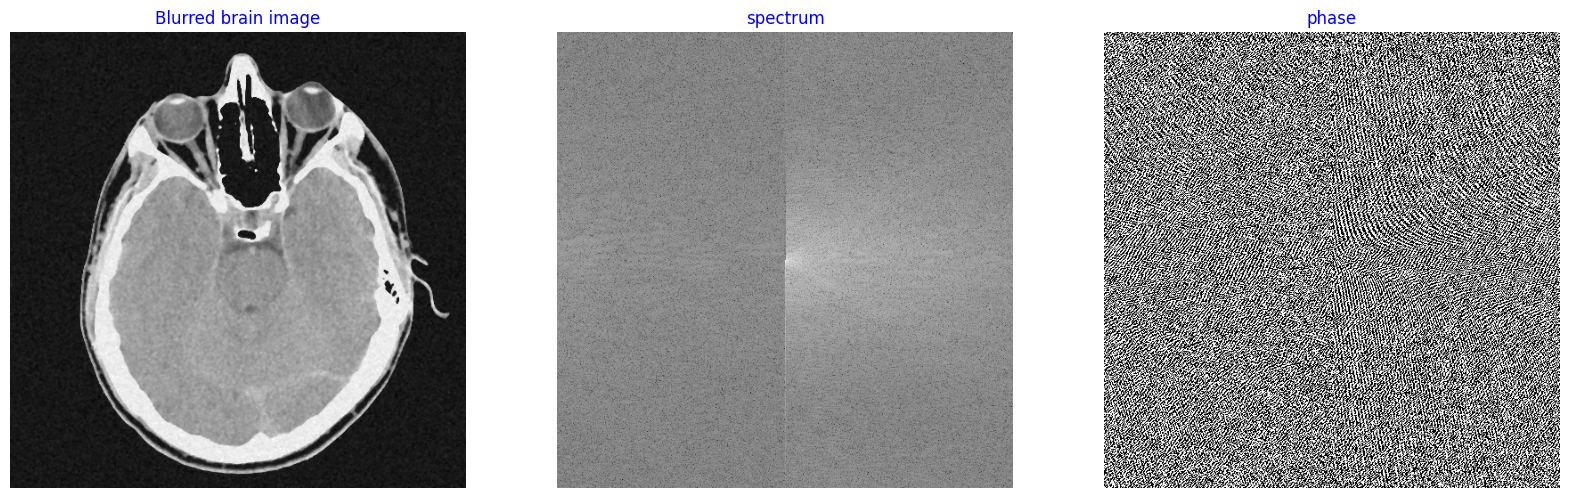

In [8]:
#@title Q5 - Part 4 (25%)
###
fourier = cv2.dft(np.float32(median_blur_brain)) # fourier
fourier_shift = np.fft.fftshift(fourier) # centering
fourier_abs = np.abs(fourier_shift)
# print(np.argwhere(fourier_abs == np.max(fourier_abs)))
spectrum = np.log(fourier_abs)
spec_normal = cv2.normalize(spectrum, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
# print(np.max(spec_normal), np.min(spec_normal))
# print(np.max(spectrum), np.min(spectrum), np.max(spectrum) - np.min(spectrum))
phase = np.angle(fourier_shift)
# print(np.min(phase), np.max(phase))
show_plots([median_blur_brain, spec_normal, phase], ["Blurred brain image", "spectrum", "phase"])

###

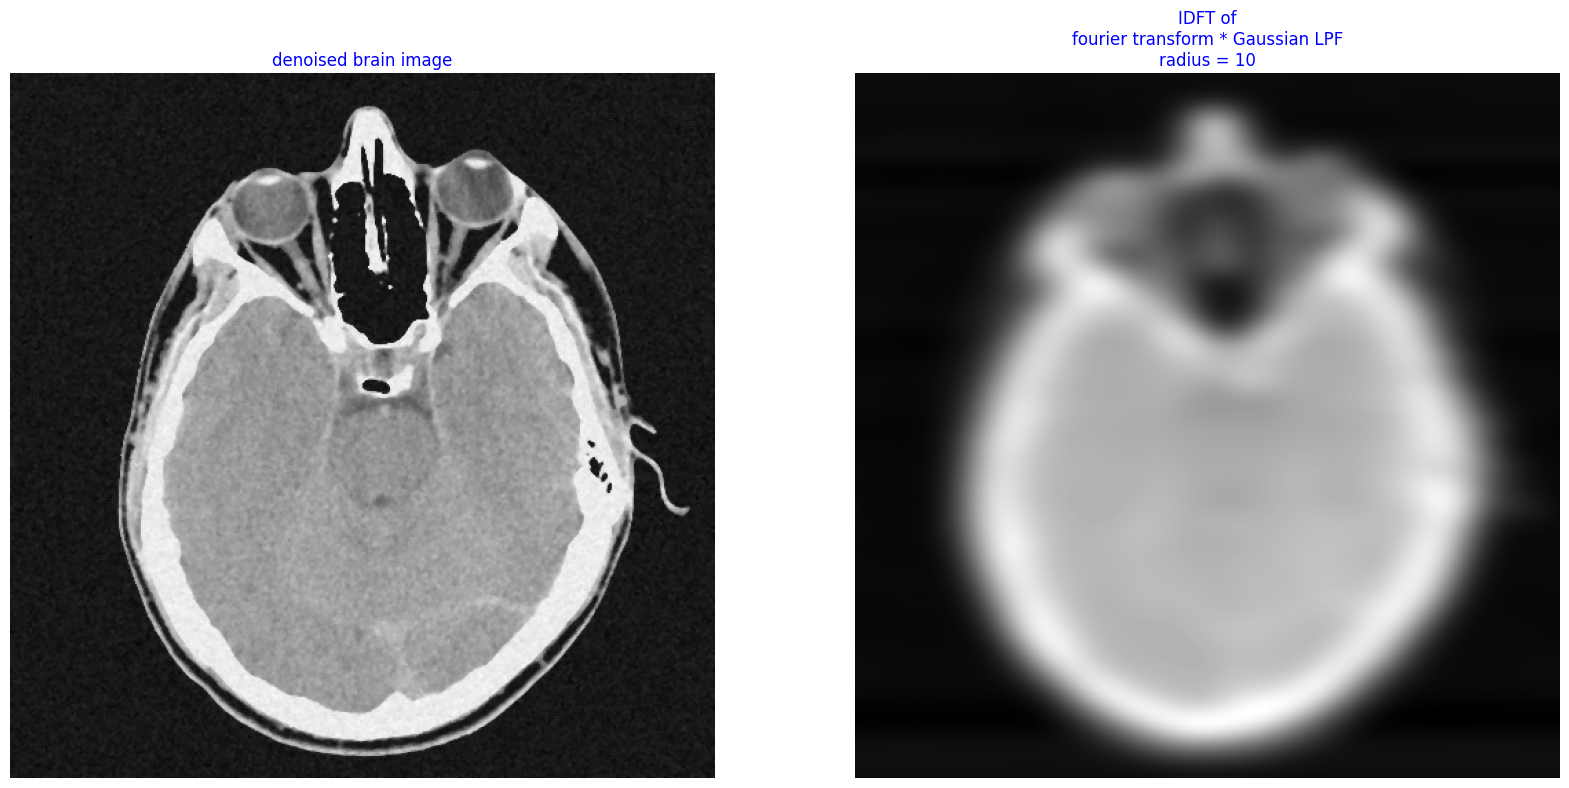

In [9]:
#@title Q5 - Part 5 (30%)
###
size = median_blur_brain.shape[0]
padded_size = size * 2
padded_brain = np.zeros((padded_size, padded_size))
padded_brain[:size, :size] = median_blur_brain

def create_gaussian_lpf(fourier_shape, radius):
    rows, cols = fourier_shape
    filter = np.zeros((rows, cols))
    center = (rows/2, cols/2)

    for i in range(rows):
        for j in range(cols):
            distance = (i - rows/2)**2 + (j - cols/2)**2
            filter[i, j] = np.exp(-distance / (2*(radius**2)))
    return filter

radius = 10
gaussian_lpf = create_gaussian_lpf(fourier.shape, radius)
fourier_lpf = fourier_shift * gaussian_lpf
# standard_show(gaussian_lpf, "test")
reconstructed_brain_image = cv2.idft(np.fft.ifftshift(fourier_lpf))
show_plots([median_blur_brain, reconstructed_brain_image],
           ["denoised brain image", f"IDFT of\nfourier transform * Gaussian LPF\nradius = {radius}"])
###

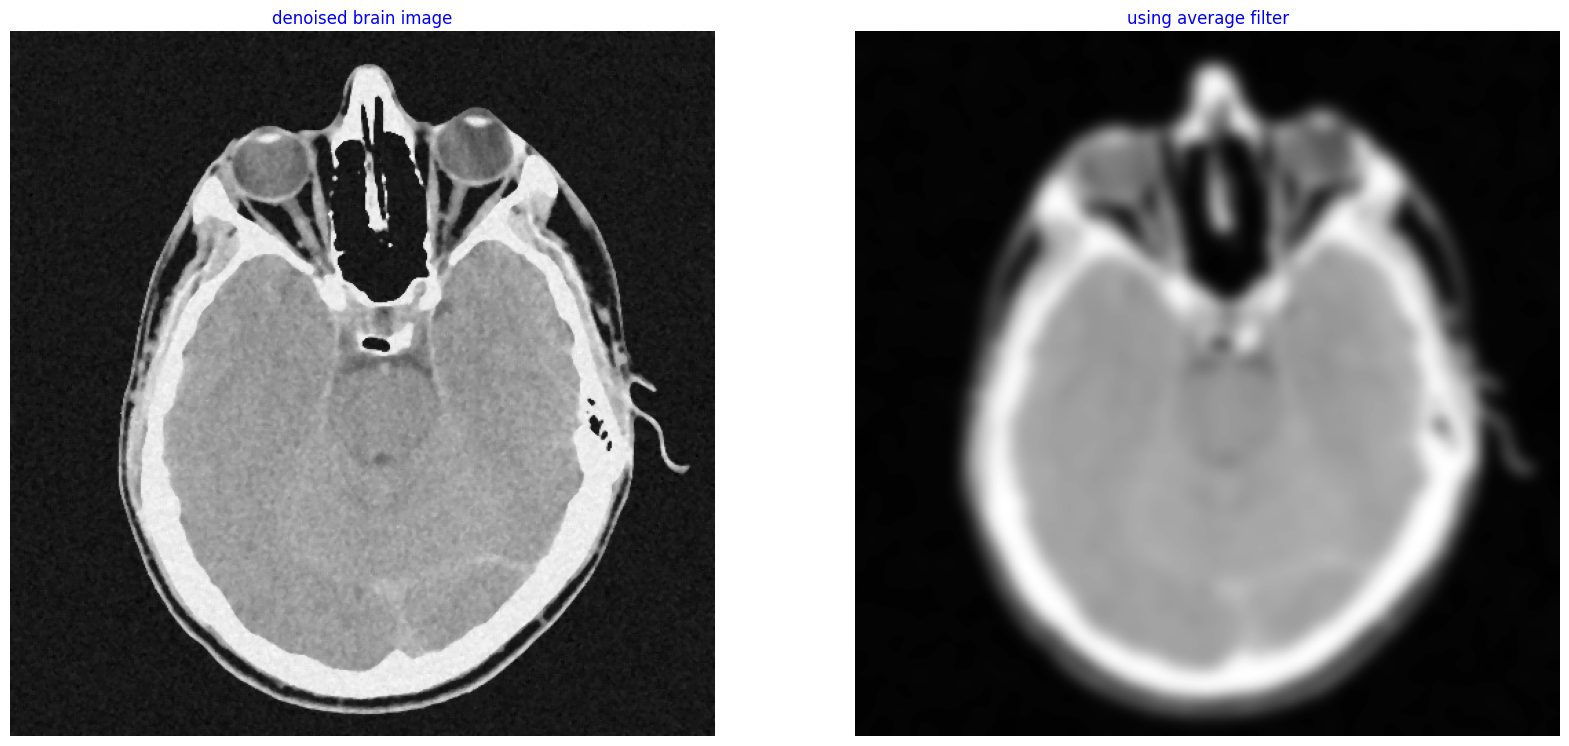

In [10]:
#@title Q5 - Part 6 (10%)
###
average_brain = cv2.GaussianBlur(median_blur_brain, (35, 35), 0)
show_plots([median_blur_brain, average_brain], ["denoised brain image", "using average filter"])
###

<div dir=rtl>
<font color='green' size="5">## توضیحات سوال ۵-۶</font>
<div>
<font size="4">
فیلتر میانگین، میانگین شدت های پنجره فیلتر را برای هر پیکسل میگذارد. این فیلتر باعث تار شدن و smooth شدن تصویر میشود
</font><br />
</div>

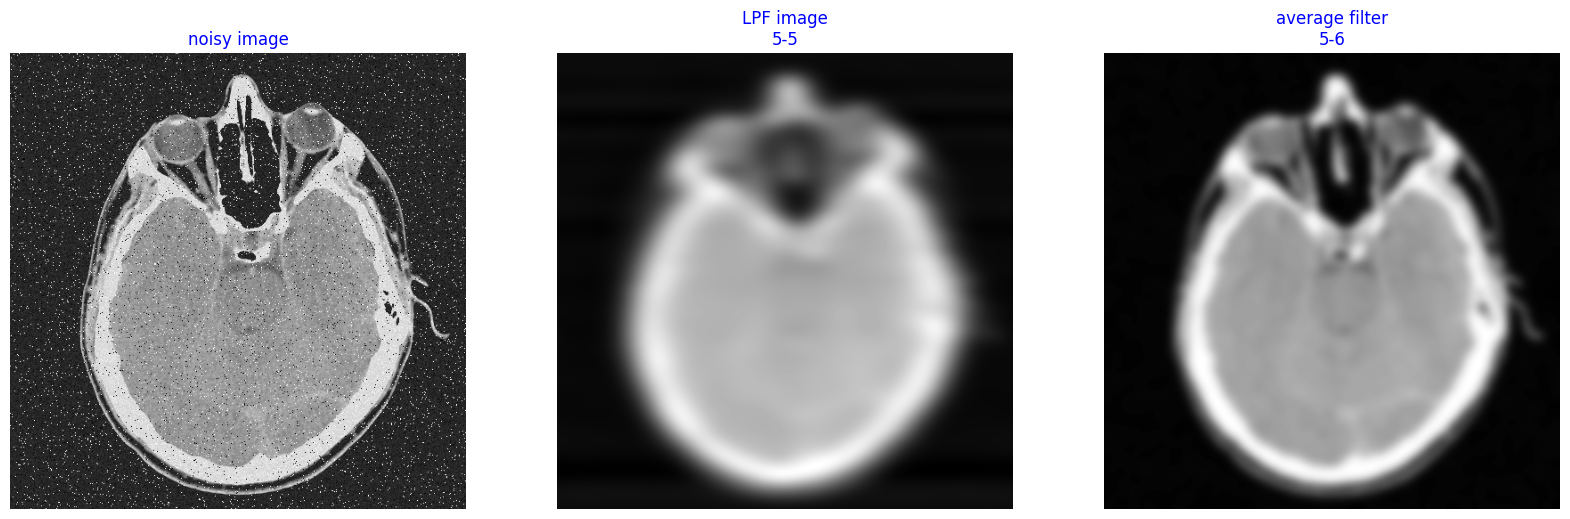

In [11]:
#@title Q5 - Part 7 (10%)
###
show_plots([noisy_brain, reconstructed_brain_image, average_brain],
          ["noisy image", "LPF image\n5-5", "average filter\n5-6"])
###

<div dir=rtl>
<font color='green' size="5">## توضیحات سوال ۵-۷</font>
<div>
<font size="4">
اگر نویز در فرکانس های بالا باشد، استفاده از فیلتر پایین گذر بهتر است. این فیلتر جزئیات تصویر را حذف میکند.
    
فیلتر میانگین گاوسی برای زمانی بهتر است که بخواهیم جزئیات تصویر حفظ شود و در عین حال نویز کم شود.

بنابراین هر دو میتوانند در استفاده خود مفید باشند اما در این مثال به نظرم فیلتر میانگین گاوسی بهتر است. چون جزئیات تصویر برای ما اهمیت دارد.
</font><br />
</div>

# Question 6: High Pass Filters (30%)

In [12]:
#@title Q6 - Part 1 (15%)
###
def my_laplacian(image: np.ndarray, angle=90):
    if angle not in [45, 90]:
        print("angle should be 45 or 90")
        return

    if angle == 90:
        laplacian_filter = np.array([[0, 1, 0],
                                    [1, -4, 1],
                                    [0, 1, 0]], dtype=np.float16)
    else:
        laplacian_filter = np.array([[1, 1, 1],
                                    [1, -8, 1],
                                    [1, 1, 1]], dtype=np.float16)

    rows, cols = image.shape
    padded_image = np.zeros((rows + 2, cols + 2))
    # print(padded_image.shape)
    padded_image[1:rows+1, 1:cols+1] = image
    laplacian = np.zeros(padded_image.shape)
    # print(padded_image.shape, image.shape, laplacian_image.shape)
    for x in range(1, rows + 1):
        for y in range(1, cols + 1):
            laplacian[x, y] = np.sum(padded_image[x-1: x+2, y-1: y+2] * laplacian_filter)
    # scaled_laplacian = np.where(laplacian<0, 0, laplacian)
    # print(np.min(laplacian_image), np.max(laplacian_image))
    # print(np.min(laplacian_image), np.max(laplacian_image))
    return laplacian[1:rows+1, 1:cols+1]
###

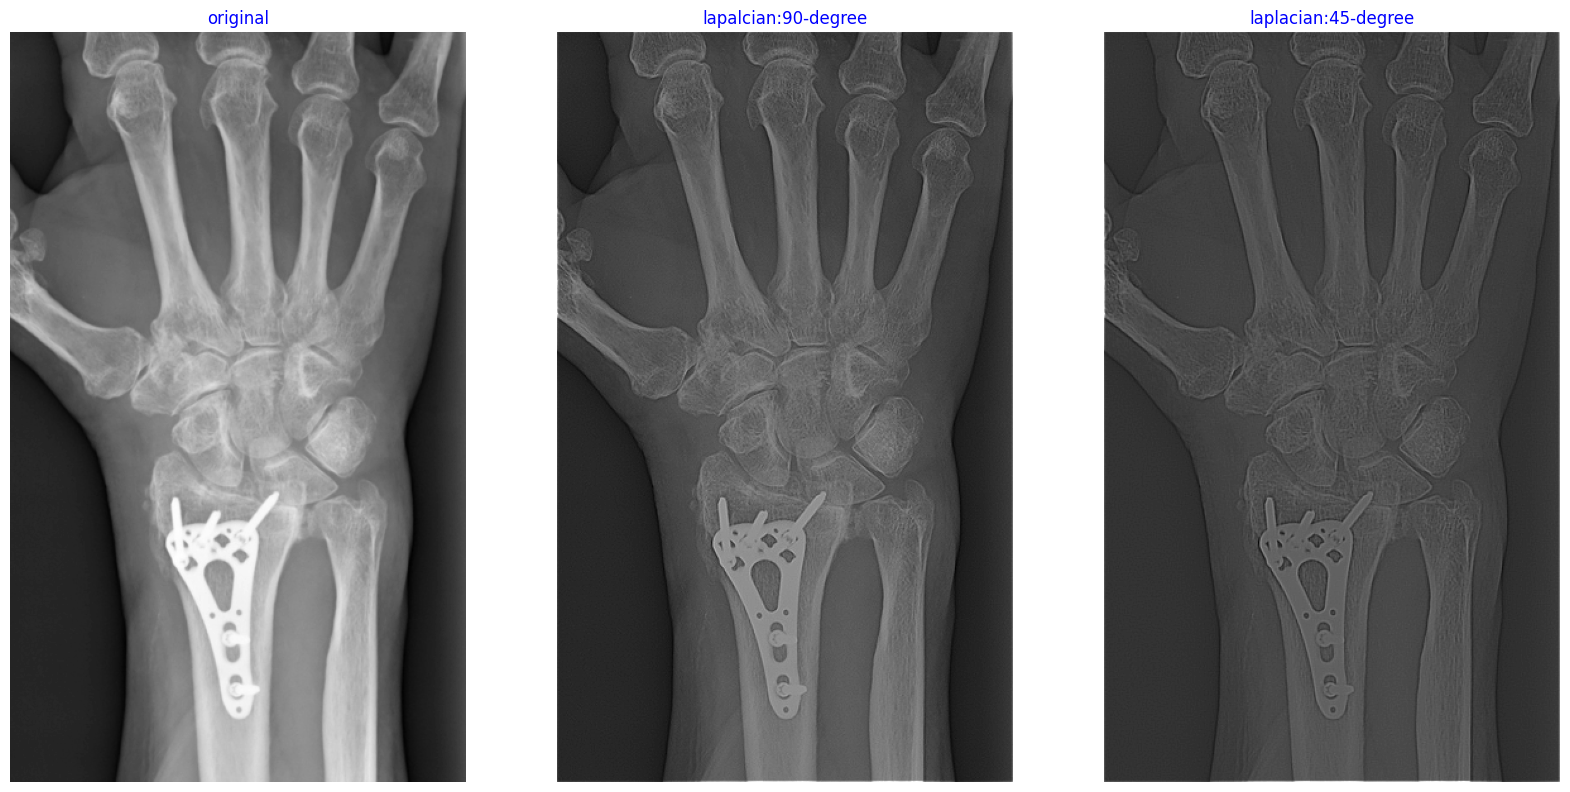

In [13]:
#@title Q6 - Part 2 (15%)
###
hand_image = cv2.imread("Hand.png", cv2.IMREAD_GRAYSCALE)
laplac_45 = my_laplacian(hand_image, 45)
laplac_90 = my_laplacian(hand_image, 90)
hand_laplac_90 = hand_image - laplac_90
hand_laplac_45 = hand_image - laplac_45

show_plots([hand_image, hand_laplac_90, hand_laplac_45], ["original", "lapalcian:90-degree", "laplacian:45-degree"])

###

<div dir=rtl><font color='green' size="5">## توضیحات سوال ۶-۲</font>
<div>

<div dir=rtl><font size="4">
تصویر حاصل از فیلتر laplacian 90 درجه تفاوت شدت‌های در راستای افقس و عمودی را بیشتر می‌کند و لبه‌ها را در این راستا مشخص‌تر میکند و بهتر نشان میدهد.

تصویر حاصل از laplacian 45 در جه تفاوت شدت های در راستای قطرهای تصویر را بهتر نشان میدهد و آنها را مشخص تر و دقیق تر میکند.

با توجه به این که در این تصویر هم لبه ها بیشتر در راستای افقی و عمودی هستند تصویر حاصل از فیلتر laplacian 90 لبه ها را بهتر نشان میدهد
 </font><br />
</div>

In [14]:
#@title Q6 - Part 3 (40%)
###
def filtering(image:np.ndarray, filter_name:str, d0=50, n=2):
    fourier = cv2.dft(np.float32(image))
    shifted_fourier = np.fft.fftshift(fourier)
    rows, cols = shifted_fourier.shape

    filter = np.zeros((rows, cols))
    if filter_name == "IHPF":
        for u in range(rows):
            for v in range(cols):
                distance = (u - rows/2)**2 + (v - cols/2)**2
                distance = np.sqrt(distance)
                if distance <= d0:
                    filter[u, v] = 0
                else:
                    filter[u, v] = 1
    elif filter_name == "BHPF":
        for u in range(rows):
            for v in range(cols):
                distance = (u - rows/2)**2 + (v - cols/2)**2
                distance = np.sqrt(distance)
                filter[u, v] = 1 / (1 + (distance/d0)**(2*n))
        filter = 1 - filter

    fourier_filter = shifted_fourier*filter
    reconstructed_image = cv2.idft(np.fft.ifftshift(fourier_filter))
    scaled_image = cv2.normalize(reconstructed_image, None, 0, 255, cv2.NORM_MINMAX)
    # print(np.min(scaled_image), np.max(scaled_image))
    return scaled_image

###

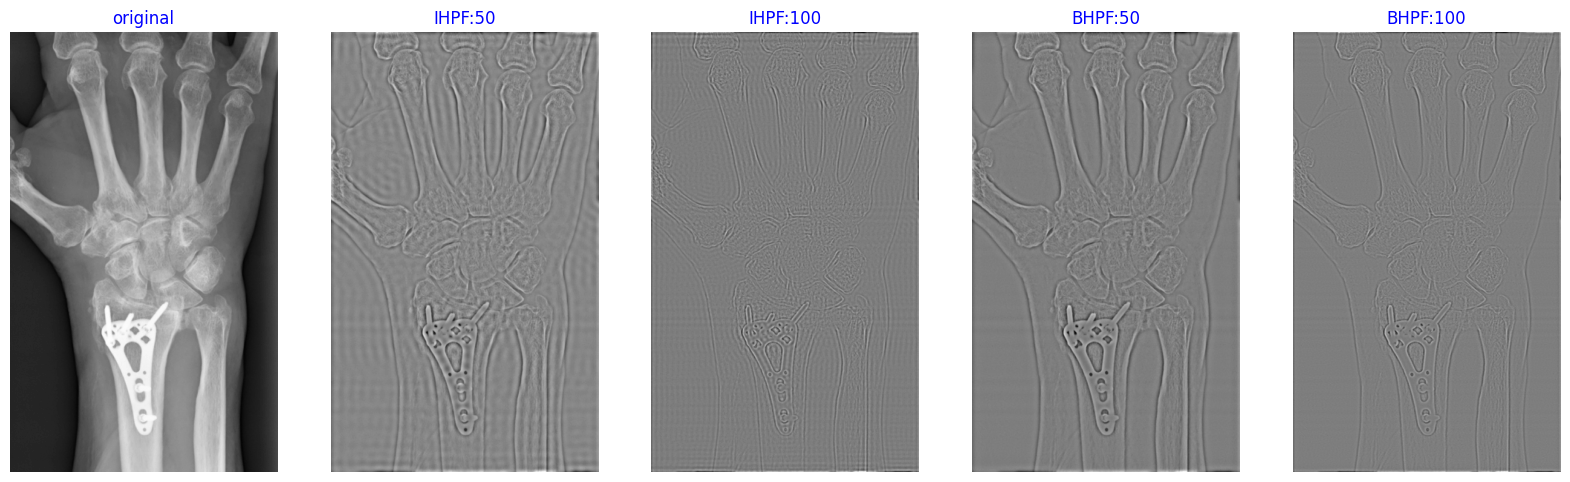

In [15]:
#@title Q6 - Part 4 (15%)
###
# print(hand_image.shape)
hand_ihpf_50 = filtering(hand_image, "IHPF", d0=50)
hand_ihpf_100 = filtering(hand_image, "IHPF", d0=100)

hand_bhpf_50 = filtering(hand_image, "BHPF", d0=50, n=2)
hand_bhpf_100 = filtering(hand_image, "BHPF", d0=100, n=2)
# print(hand_image.dtype, hand_bhpf_100.dtype)

show_plots([hand_image, hand_ihpf_50, hand_ihpf_100, hand_bhpf_50, hand_bhpf_100],
           ["original", "IHPF:50", "IHPF:100", "BHPF:50", "BHPF:100"])
###

<div dir=rtl>
<font color='green' size="5">## توضیحات سوال  ۶-۴</font>
<div>
<font size="4">
در تصاویر حاصل از فیلتر IHPF موج مشاهده میشود اما BHPF اینگونه نیست

هرچه شعاع فیلتر بالاگذر بیشتر میشود، قسمت های مختلف تصویر کم کم قابل تشخیص نمیشوند. زیرا فرکانس های پایین را کمتر از خود عبور میدهند و فقط فرکانس های بالاتر میمانند که تاثیر آنها در تصویر کمترند.
</font><br />
</div>

15 217
-606.0 248.0
-2.796855656133893e-15 255.0
1.908561168282893e-16 255.0


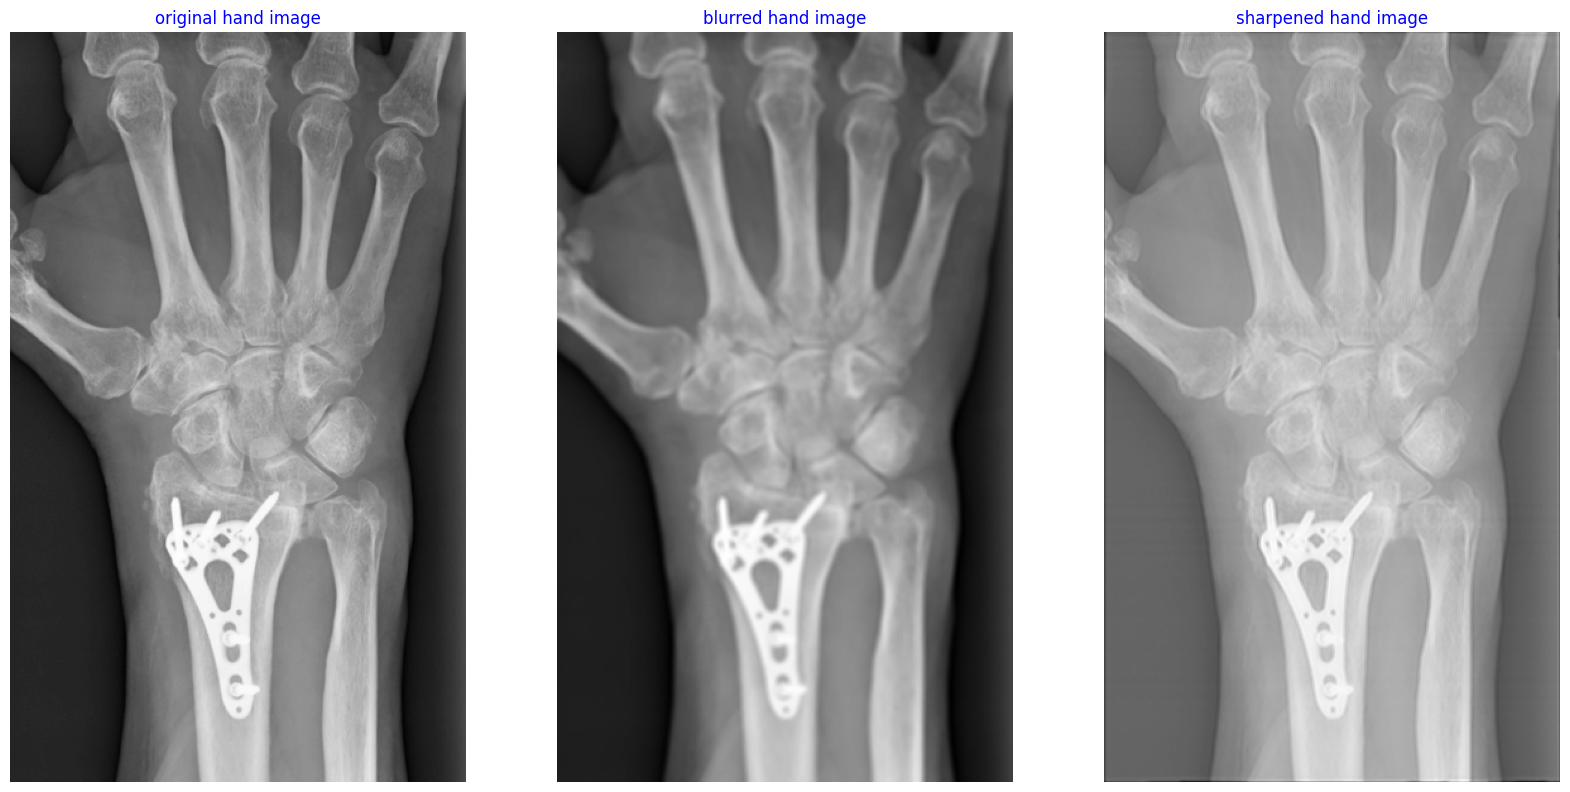

In [16]:
#@title Q6 - Part 5 (15%)
###
blur_hand = cv2.imread("Blur_Hand.png", cv2.IMREAD_GRAYSCALE)
print(np.min(blur_hand), np.max(blur_hand))
lap45 = my_laplacian(hand_image, 45)
# scaled_lap45 = cv2.normalize(lap45, None, 0, 255, cv2.NORM_MINMAX)
print(np.min(lap45), np.max(lap45))
# lap45 = np.where(lap45<0, 0, lap45)
bhpf100 = filtering(hand_image, "BHPF", d0=100, n=2)
print(np.min(bhpf100), np.max(bhpf100))
# bhpf100 = np.where(bhpf100<0, 0, bhpf100)
# scaled_bhpf100 = cv2.normalize(bhpf100, None, 0, 255, cv2.NORM_MINMAX)
sharpened = 0.5*blur_hand + 0.1*lap45 + 0.4*bhpf100
# sharpened = np.where(sharpened>255, 255, sharpened)
sharpened = cv2.normalize(sharpened, None, 0, 255, cv2.NORM_MINMAX)
print(np.min(sharpened), np.max(sharpened))
show_plots([hand_image, blur_hand, sharpened], ["original hand image", "blurred hand image", "sharpened hand image"])
###

<div dir=rtl>
<font color='green' size="5">## توضیحات سوال ۶-۵</font>
<div>
<font size="4">
متن مورد نظر در این جا نوشته شود.(برای نوشتن دوبار اینجا کلیک کنید)

 برای رفتن به خط بعد، دو بار اینتر بزنید.
 </font><br />
</div>